# Dimension Reduction

To find the distance between 2 points in a N Dimensional hyperplane:

Sqrt(N/6)

So by this formula we can calculate the distance b/w 2 points.Since the distance is too far so we need to reduce the distance. For that we need to reduce the dimaention of the hyperplane so that the distance b/w the points are also reduced. 

# Distance b/w two point in N-D hyperplane

##For 1M-D,784-D,2-D Hyperpalne respectively

In [1]:
(1000000/6)**0.5

408.248290463863

In [2]:
(784/6)**0.5

11.430952132988164

In [3]:
(2/6)**0.5

0.5773502691896257

In [4]:
(1/6)**0.5

0.408248290463863

# Main Approaches for Dimensionality Reduction

1.Projection

2.Many Fold Learning

# PCA(Preserving the Variance)

Before we project lower dimensional data on higher plane we need to choose the right hyperplane where the information loss will be the least.

PCA identifies the axis that accounts for the largest amount of variance in the training set



There is a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices U Σ V⊺, where V contains the unit vectors that define all the principal components that we are looking for.



In [9]:
from sklearn.decomposition import PCA
from sklearn.datasets import make_swiss_roll
X,t = make_swiss_roll(n_samples=1000, noise=0.2,random_state=42)

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.c_[X,t], columns=["X","Y","Z","label"])
df.head()

,X,Y,Z,label
0,-3.296771,4.261985,7.697877,8.242346
1,5.959727,11.457843,12.726253,13.672660
2,6.660515,18.158204,-9.847133,11.611269
3,-6.118241,15.483648,-8.305894,10.354612
4,6.334439,16.410635,-0.491330,6.182830


In [11]:
import plotly.express as px

px.scatter_3d(df, x="X",y="Y",z="Z",color="label")

In [12]:
pca = PCA(n_components=2)

In [13]:
X.shape

(1000, 3)

In [14]:
X2D = pca.fit_transform(X)

In [15]:
X2D

array([[  2.08374001,   9.97769318],
       [ 12.53136592,   4.15352368],
       [ -4.26069341, -11.17296129],
       ...,
       [ -0.57812196,  -2.30906044],
       [ 10.64441015,   6.37488622],
       [ -3.04227432,  11.58268844]])

In [16]:
df_2 = pd.DataFrame(np.c_[X2D, t], columns=["X","Y","label"])
px.scatter(df_2, x="X",y="Y",color="label")

In [17]:
import numpy as np

arr = np.array([1,2,3])
np.cumsum(arr)

array([1, 3, 6], dtype=int32)

In [18]:
pca.explained_variance_

array([52.52397747, 38.89506814])

In [19]:
pca.explained_variance_ratio_

array([0.40782396, 0.3020019 ])

In [20]:
sum(pca.explained_variance_)

91.41904560539038

# Now choose the right no.of dimensions

In [21]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [25]:
from sklearn.model_selection import train_test_split

X=mnist["data"]
y=mnist["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [26]:
X_train.shape

(52500, 784)

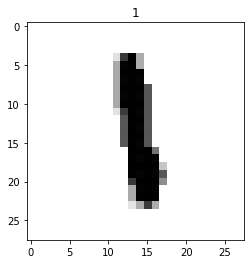

In [28]:
import matplotlib.pyplot as plt

sample =X[200]
label = y[200]
image = sample.reshape(28,28)

plt.imshow(image,cmap='binary')
plt.title(str(label))
plt.show()

In [29]:
import numpy as np

pca = PCA()
pca.fit(X_train)
cumsum =np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

In [30]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [31]:
X_train.shape

(52500, 784)

In [34]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [35]:
X_recovered.shape

(52500, 784)

In [36]:
X_reduced.shape

(52500, 154)

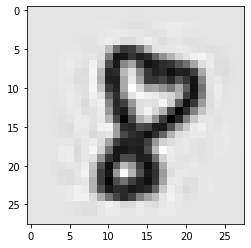

In [40]:
plt.imshow(X_recovered[1].reshape(28,28), cmap="binary")

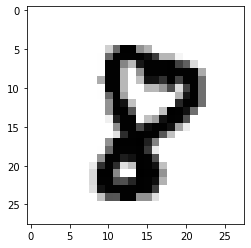

In [41]:
plt.imshow(X_train[1].reshape(28, 28), cmap="binary")

In [42]:
from sklearn.decomposition import KernelPCA

In [44]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
rbf_pca = KernelPCA(n_components=2,kernel="rbf",gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

In [45]:
X.shape

(1000, 3)

In [46]:
X_reduced.shape

(1000, 2)